# Lab 04
*Date: 2024-12-05*

## Topics
- Everything
- Everywhere
- All at once

## Please, do the following exercises!
Exercises are taken from Exam of 2023-02-10

**PoliGame** is a new (very simple!) game with the following rules. Each cell of a 5x5 matrix is filled with possible moves: UP, RIGHT, DOWN, LEFT, or WIN (a special ‘move’ that corresponds to the final goal of the game). The player is a single pawn; at the beginning, the pawn is assigned a starting position. The following questions have the objective of building PoliGame with Python code.

### Q1 \[5 pts\]
Implement the PoliGame constructor, which sets the board for the game (a 5x5 matrix of **random** ‘moves’) and the initial position of the pawn on the board. Solutions that build the board using comprehension are preferred.

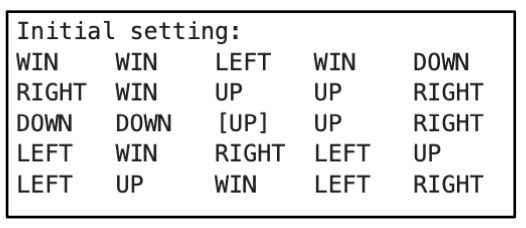

Initioal Setting:
down  left  down  win  right
right  left  right  right  right
[right]  down  up  down  left
win  left  win  up  win
left  win  up  right  up


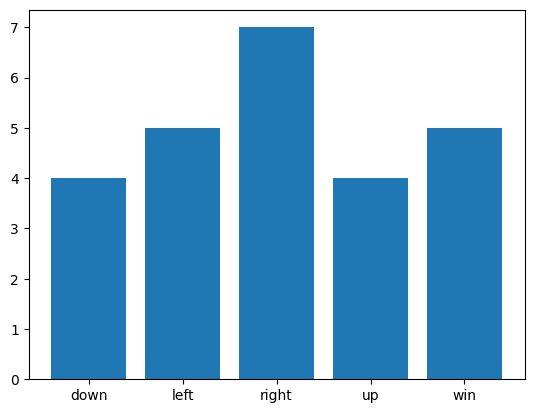

'the pawn won the game in 3 moves'

In [2]:
import random
import matplotlib.pyplot as plt

def check(counter):
    if counter<10:
        return True
    else:
        raise MaxNumMovesException


class PoliGame:
    def __init__(self):
        self.board = [random.choices(['up','down','right','left','win'], k=5) for i in range(5)]
        self.start_point=(random.randint(0,4),random.randint(0,4))

    def __str__(self):
        board=[]
        for i in range(len(self.board)):
            row=[]
            for j in range(len(self.board[i])):
                if (i,j)==self.start_point:
                    row.append(f'[{self.board[i][j]}]')
                else:
                    row.append(self.board[i][j])
            board.append(row)
        board='\n'.join(['  '.join(row) for row in board])
        return f'Initioal Setting:\n'+board

    def draw_moves_plot(self):
        dict_move={'up':0 ,'down':0 ,'right':0,'left':0,'win':0}
        for row in self.board:
            for col in row:
                dict_move[col]+=1

        x=sorted(dict_move.keys())
        y=[dict_move[ky] for ky in x ]
        plt.bar(x,y)
        plt.show()

    def one_step_move(self):
       counter=0
       i,j=self.start_point
       try:
        while check(counter):
          status=self.board[i][j]
          if status == 'win':
               return f'the pawn won the game in {counter} moves'
               break
          elif status == 'up':
              if i-1 in range(len(self.board)):
                  i=i-1
                  j=j
                  counter+=1
              else:
                  raise OutOfBoardException

          elif status == 'down':
              if i+1 in range(len(self.board)):
                  i=i+1
                  j=j
                  counter+=1
              else:
                  raise OutOfBoardException
          elif status == 'right':
              if j+1 in range(len(self.board)):
                  i=i
                  j=j+1
                  counter+=1
              else:
                  raise OutOfBoardException
          elif status == 'left':
              if j-1 in range(len(self.board)):
                  i=i
                  j=j-1
                  counter+=1
              else:
                  raise OutOfBoardException
       except OutOfBoardException as e:
           print(e)
       except MaxNumMovesException as m:
           print(m)


p=PoliGame()
print(p)
p.draw_moves_plot()
p.one_step_move()

### Q2 \[5 pts\]
Implement the method that prints the state of the game (the board, with the marked `[...]` position of the pawn). See the one example print, where the current position of the pawn is (2, 2).

In [12]:
import random
import matplotlib.pyplot as plt
class OutOfBoardException(Exception):
    def __init__(self):
        self.message = 'Out of Board Exception'
    def __str__(self):
        return self.message

class MaxNumMovesException(Exception):
    def __init__(self):
        self.message = 'Max Num Move Exception'
    def __str__(self):
        return self.message

#or define for recursion
def check(counter):
    if counter<10:
        return True
    else:
        raise MaxNumMovesException


class Poligame:
    def __init__(self):
       self.board = [random.choices(['up','down','right','left','win'], k=5) for i in range(5)]
       self.strt_pos= insert_pawn_position()#(random.randint(0,5),random.randint(0,5))

    def __str__(self):
      output = ""
      for r in range(5):
        row = []
        for c in range(5):
            move = self.board[r][c]
            if (r,c) == self.strt_pos:
                row.append(f'[{move}]')
            else:
                row.append(move)
        output += "   ".join(row) + "\n"
      return output


    def draw_moves_plot(self):
        a=[col for row in self.board for col in row]
        freq_diction={'up':a.count('up'),'down':a.count('down'),'right':a.count('right'),'left':a.count('left'),'win':a.count('win')}
        x=sorted(freq_diction.keys())
        y=freq_diction.values()
        plt.bar(x,y)
        plt.show()

    def one_step_move(self):
        i,j=self.strt_pos
        try:
             result=self.rec_move(i,j,0)
             print(result)
        except OutOfBoardException as e:
            print(e)
        except MaxNumMovesException as e:
            print(e)



    def rec_move(self, i, j, counter:int):
         if not (0 <= i < len(self.board) and 0 <= j < len(self.board[0])):
             raise OutOfBoardException()
         if counter >= 10:
             raise MaxNumMovesException()

         status = self.board[i][j]
         print(f"At ({i},{j}) → {status}")
         if status == 'win':
            print( f'The pawn won the game in {counter} moves')
            return counter

         elif status == 'up':
            counter+=1
            return self.rec_move(i - 1, j, counter)
         elif status == 'down':
              counter+=1
              return self.rec_move(i + 1, j, counter)
         elif status == 'left':
             counter+=1
             return self.rec_move(i, j - 1, counter)
         elif status == 'right':
            counter+=1
            return self.rec_move(i, j + 1, counter)




p2=Poligame()
print(p2)

up   left   win   up   right
down   up   left   [left]   left
left   up   up   win   down
down   up   right   right   win
up   down   down   right   left



### Q3 \[5 pts\]
Implement the method `draw_moves_plot()`, which shows the bar plot that counts the occurrences of each move, as written on the board. The order of moves in the x-axis should be alphabetical (example below).

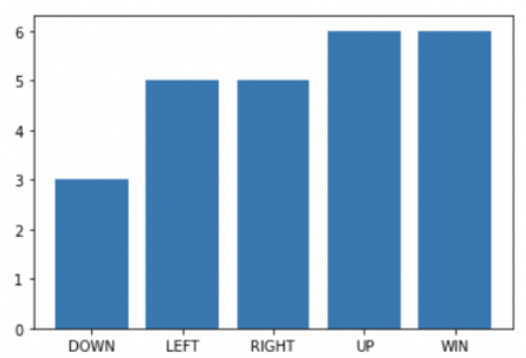

### Q4 [7 pts]
Implement a ~~recursive~~ *iterative* method `one_step_move()` that allows the pawn to be moved exactly in the direction indicated by its position on the board. To avoid infinite loops, the moves are only allowed up to a maximum finite number, set outside of the class, and checked by the function. The function should allow the following outcomes: if a WIN directive is found, the function prints a related message and returns information on the number of made moves: if a UP, RIGHT, DOWN, or LEFT directive is found, the pawn is moved accordingly on the board and the function called again. The pawn loses the game in two cases: a) it goes out of the board, in which case an OutOfBoardException is thrown and handled, also printing a related message; b) the maximum number of moves is reached, in which case a MaxNumMovesException is thrown and handled, also printing a related message. Below, three example outcomes of a game (with six maximum moves), with their related print messages.

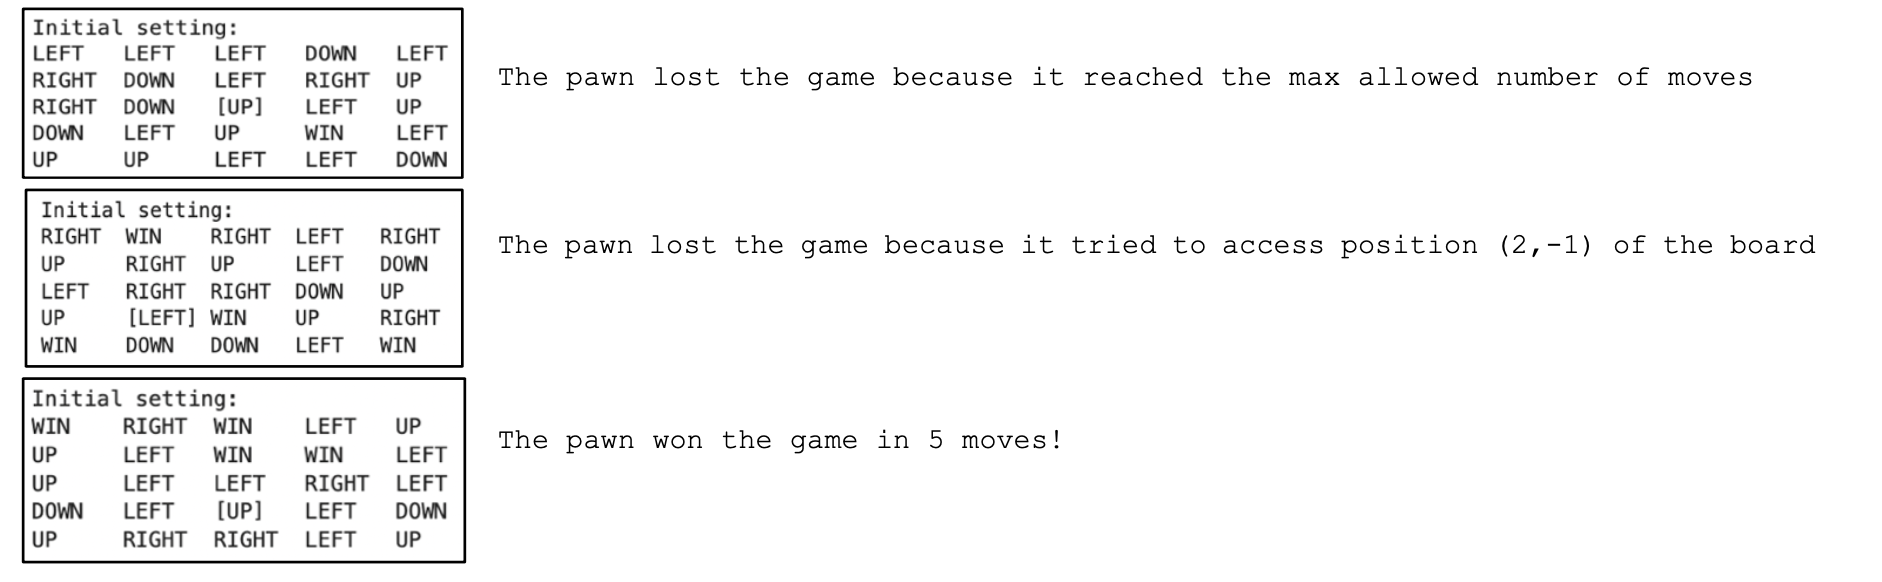

### Q5 \[5 pts\]
Write a function `insert_pawn_position()` outside of the PoliGame class, which allows to handle the input from keyboard of the two initial coordinates of the pawn, with appropriate checks on the values.

In [9]:
def insert_pawn_position():
    start=input('Insert Pawn Position Number: '). split(',')
    if len(start)!=2:
        raise ValueError('please insert a cordinate of this format row,col')
    i,j=map(int, start)
    if 0<=i<=5 and 0<=j<=5:
        return (i,j)

insert_pawn_position()

(1, 3)

### Q6 \[5 pts\]
Write a function `play_poligame()` outside of the PoliGame class, which allows to play the game multiple times. Specifically, it accepts in input two parameters: one to express the requested number of games, one to express the maximum number of moves allowed in a single game. For each game that was requested, the function performs the following tasks: acquires the initial coordinates of the pawn (Q5); instantiates the game (Q1); appends the print of the board in a file `boards_record.txt` (Q2); prints the related bar plot on screen (Q3); and calls the recursive function (Q4). Finally, it draws a boxplot representing the distribution of the numbers of moves in the winning games.

In [15]:
import matplotlib.pyplot as plt

def play_poligame(numbergame:int , maxconstrain:int):
    with open('boards_record.txt','a') as f:
      data=[]
      for _ in range(numbergame):
        pos=insert_pawn_position()
        g=PoliGame()
        f.write(str(g))
        g.draw_moves_plot()
        c=g.one_step_move()
        #define a method for checking this - now there is no time just read the Ta solution
        if c=='win':
            data.append(c)
    plt.box(data)
    plt.show()





